<a href="https://colab.research.google.com/github/HadilDrissi/Medical-Diagnosis-System/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=ef9a456e030c21f34eeb865c6bde20ae4944018faae4288647218e0acdfc8eee
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


The diagnosis is 41.72955974842767 % positive.


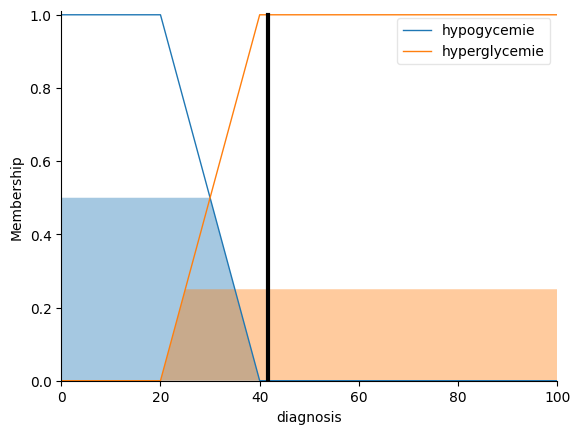

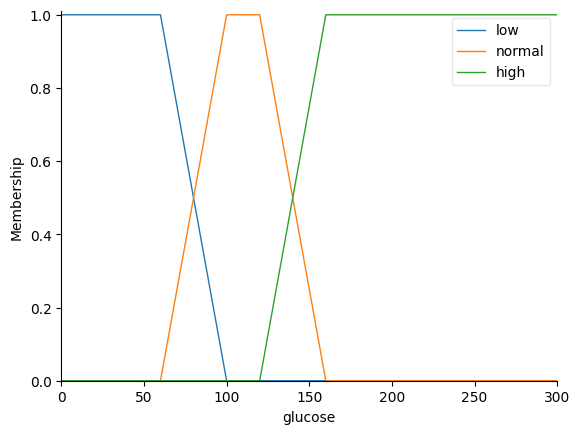

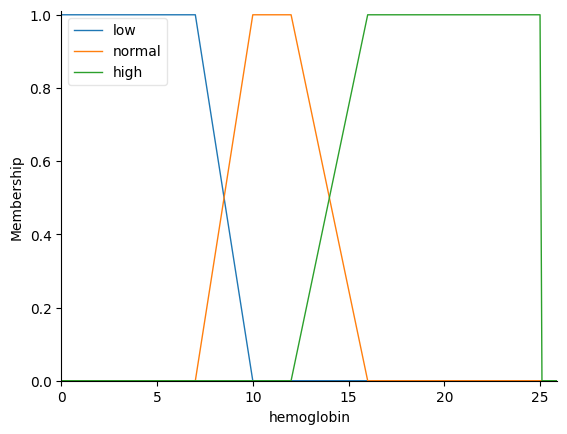

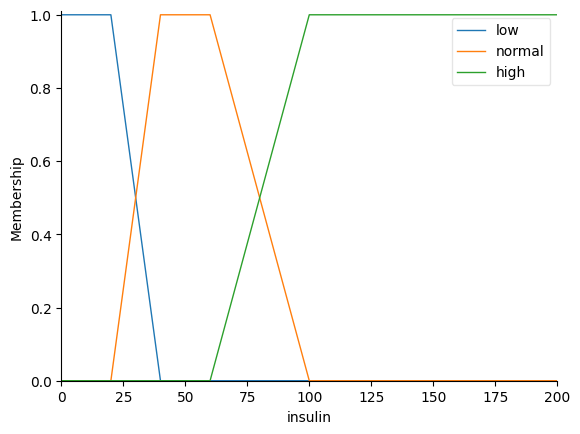

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#  variables d'entré
glucose = ctrl.Antecedent(np.arange(0, 301, 1), 'glucose')
hemoglobin = ctrl.Antecedent(np.arange(0, 26, 0.1), 'hemoglobin')
insulin = ctrl.Antecedent(np.arange(0, 201, 1), 'insulin')

#  variable de sortie
diagnosis = ctrl.Consequent(np.arange(0, 101, 1), 'diagnosis')

# membership functions for Input(fuzz)

glucose['low'] = fuzz.trapmf(glucose.universe, [0, 0, 60, 100])
glucose['normal'] = fuzz.trapmf(glucose.universe, [60, 100, 120, 160])
glucose['high'] = fuzz.trapmf(glucose.universe, [120, 160, 300, 300])


hemoglobin['low'] = fuzz.trapmf(hemoglobin.universe, [0, 0, 7, 10])
hemoglobin['normal'] = fuzz.trapmf(hemoglobin.universe, [7, 10, 12, 16])
hemoglobin['high'] = fuzz.trapmf(hemoglobin.universe, [12, 16, 25, 25])


insulin['low'] = fuzz.trapmf(insulin.universe, [0, 0, 20, 40])
insulin['normal'] = fuzz.trapmf(insulin.universe, [20, 40, 60, 100])
insulin['high'] = fuzz.trapmf(insulin.universe, [60, 100, 200, 200])

# Membership functions for output
diagnosis['hypogycemie'] = fuzz.trapmf(diagnosis.universe, [0, 0, 20, 40])
diagnosis['hyperglycemie'] = fuzz.trapmf(diagnosis.universe, [20, 40, 100, 100])

# Rules
rule1 = ctrl.Rule(glucose['low'] & hemoglobin['low'], diagnosis['hypogycemie'])
rule2 = ctrl.Rule(glucose['normal'] & hemoglobin['normal'] & insulin['normal'], diagnosis['hypogycemie'])
rule3 = ctrl.Rule(glucose['high'] & insulin['high'], diagnosis['hyperglycemie'])
rule4 = ctrl.Rule(glucose['normal'] & hemoglobin['high'] & insulin['normal'], diagnosis['hyperglycemie'])
rule5 = ctrl.Rule(glucose['normal'] & hemoglobin['normal'] & insulin['low'], diagnosis['hyperglycemie'])
rule6 = ctrl.Rule(glucose['normal'] & hemoglobin['high'] & insulin['high'], diagnosis['hyperglycemie'])

# System simulation
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Input values
diagnosis_sim.input['glucose'] = 130
diagnosis_sim.input['hemoglobin'] = 9.5
diagnosis_sim.input['insulin'] = 80


diagnosis_sim.compute()

# Output
print("The diagnosis is",diagnosis_sim.output['diagnosis'],"% positive.")
diagnosis.view(sim=diagnosis_sim)
glucose.view()
hemoglobin.view()
insulin.view()
